## Final Project Submission

Please fill out:
* Student name: Max Zimmerman
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
# IMPORTING LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context("talk")


In [3]:
#plt.style.available

In [4]:
#ls

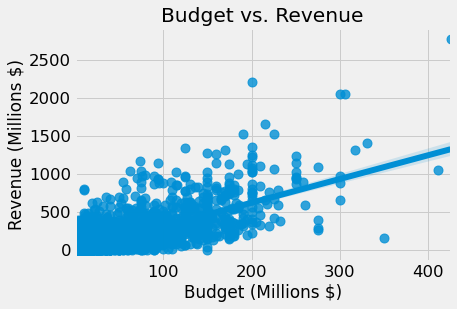

,id,release_date,production_budget,worldwide_gross,ROI
movie,,,,,
Mad Max,14,"Mar 21, 1980",0.20,99.750000,498.750000
Paranormal Activity,93,"Sep 25, 2009",0.45,194.183034,431.517853
The Gallows,80,"Jul 10, 2015",0.10,41.656474,416.564740
The Blair Witch Project,7,"Jul 14, 1999",0.60,248.300000,413.833333


In [5]:
budgets = pd.read_csv("tn.movie_budgets.csv.gz")
budgets["production_budget"].sort_values(ascending=False)

#Getting rid of commas to turn numbers into ints, as well as dividing both budget and income by a million for readability
budgets["production_budget"] = budgets["production_budget"].apply(lambda x: x[1:]).str.replace(",", "").astype(int)/1000000
budgets["worldwide_gross"] = budgets["worldwide_gross"].apply(lambda x: x[1:]).str.replace(",", "").astype(int)/1000000  

#ROI DEFINED HERE ARE GROSS REVENUE DIVIDED BY BUDGET
budgets["ROI"] = budgets["worldwide_gross"]/budgets["production_budget"]
budgets.sort_values("ROI", ascending = False)

with plt.style.context("fivethirtyeight"):
    fig = sns.regplot(x = "production_budget", y = "worldwide_gross", data = budgets);
    plt.xlabel("Budget (Millions $)")
    plt.ylabel("Revenue (Millions $)")
    plt.title("Budget vs. Revenue")
    plt.show(fig)


new = budgets.set_index("movie").sort_values("ROI", ascending = False).head()


new.drop("domestic_gross", axis = 1).iloc[1:]






Microsoft should take the time to study the above movies given their impressive return on investment. Each of them made over 400 times the money they invested! They should also get in touch with each movie's director and production team to go over what most of the budget money was allocated towards (advertising, special effects, etc.) Microsoft should also not be afraid of going a little over their budget, as in most cases, movies with higher budgets tended to make more money. 

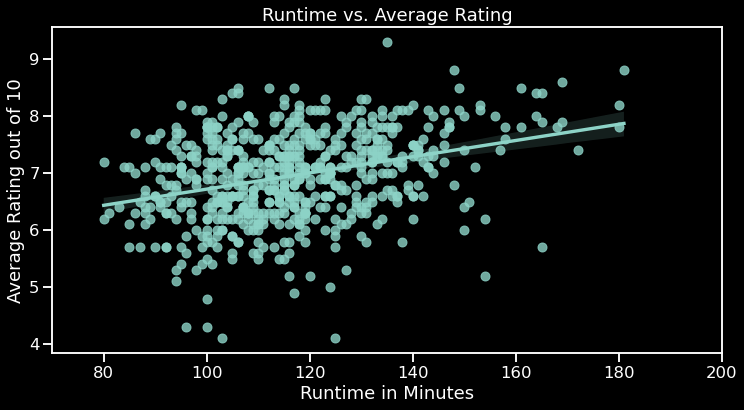

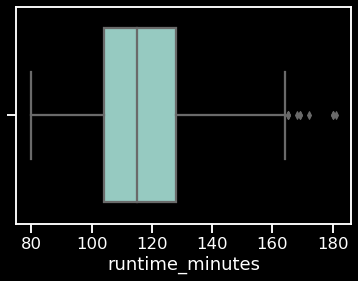

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 


title_basics = pd.read_csv("imdb.title.basics.csv.gz")
title_basics.rename(columns={"primary_title": "movie"}, inplace=True)
title_ratings = pd.read_csv("imdb.title.ratings.csv.gz")
#merging two datasets based on the column "movie"
big_df = pd.merge(title_ratings, title_basics)
#Sorting df by number of votes, then deleting any rows with less than 100,000 votes and then sorting by average rating
big_df.sort_values("numvotes", ascending = False, inplace = True)
big_df = big_df.loc[big_df["numvotes"] > 100000].sort_values("averagerating", ascending = False)
big_df["runtime_minutes"] = big_df["runtime_minutes"].astype("float")
big_df.dropna(subset = ["runtime_minutes"], inplace = True)
big_df.head()
big_df
#sns.regplot(data=df, x="Run Time", y="Gross");
with plt.style.context("dark_background"):
    plt.figure(figsize = (12,6))
    fig = sns.regplot(x="runtime_minutes", y="averagerating", data=big_df);
    plt.xlim(70, 200);
    plt.xlabel("Runtime in Minutes");
    plt.ylabel("Average Rating out of 10");
    plt.title("Runtime vs. Average Rating");
    plt.show(fig)
    sns.boxplot(big_df["runtime_minutes"])


Microsoft should not be afraid to create a longer movie, but should keep in mind that the average runtime for most popular movies was between 110 and 130 minutes. 

In [8]:
big_df
#Main point of code below is to find average ratings for specific runtime timespans, and then to see how accurate
#these findings are by seeing how many movies also fall in this runtime range

,tconst,averagerating,numvotes,movie,original_title,start_year,runtime_minutes,genres
9643,tt5813916,9.3,100568,The Mountain II,Dag II,2016,135.0,"Action,Drama,War"
63498,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
59785,tt4154796,8.8,441135,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi"
24920,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
33441,tt4633694,8.5,210869,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0,"Action,Adventure,Animation"
...,...,...,...,...,...,...,...,...
71702,tt1815862,4.8,181687,After Earth,After Earth,2013,100.0,"Action,Adventure,Drama"
12347,tt1071875,4.3,103608,Ghost Rider: Spirit of Vengeance,Ghost Rider: Spirit of Vengeance,2011,96.0,"Action,Fantasy,Thriller"
71454,tt1502712,4.3,140148,Fantastic Four,Fantastic Four,2015,100.0,"Action,Adventure,Drama"
72563,tt0938283,4.1,137734,The Last Airbender,The Last Airbender,2010,103.0,"Action,Adventure,Family"


In [9]:
big_df[(big_df['runtime_minutes']>= 80 ) & (big_df['runtime_minutes']<100)]["averagerating"].mean()

6.664130434782609

In [10]:
big_df[(big_df['runtime_minutes']>= 80 ) & (big_df['runtime_minutes']<100)]["averagerating"].count()

92

In [11]:
big_df[(big_df['runtime_minutes']>= 100 ) & (big_df['runtime_minutes']< 120)]["averagerating"].mean()

6.837414965986394

In [12]:
big_df[(big_df['runtime_minutes']>= 100 ) & (big_df['runtime_minutes']< 120)]["averagerating"].count()

294

In [13]:
big_df[(big_df['runtime_minutes']>= 120 ) & (big_df['runtime_minutes']< 140)]["averagerating"].mean()

7.116071428571432

In [14]:
big_df[(big_df['runtime_minutes']>= 120 ) & (big_df['runtime_minutes']< 140)]["averagerating"].count()

168

In [15]:
big_df[(big_df['runtime_minutes']>= 140 ) & (big_df['runtime_minutes']< 160)]["averagerating"].mean()

7.368000000000003

In [16]:
big_df[(big_df['runtime_minutes']>= 140 ) & (big_df['runtime_minutes']< 160)]["averagerating"].count()

50

Average rating goes up as runtime goes up, however there is also not as much data for either short or long movies. Most of the movies lie in between the runtimes of 100 to 140 minutes.


In [17]:
big_df[(big_df['runtime_minutes']>= 160 )]["averagerating"].mean()

7.942857142857143

In [18]:
big_df[(big_df['runtime_minutes']>= 160 )]["averagerating"].count()

14

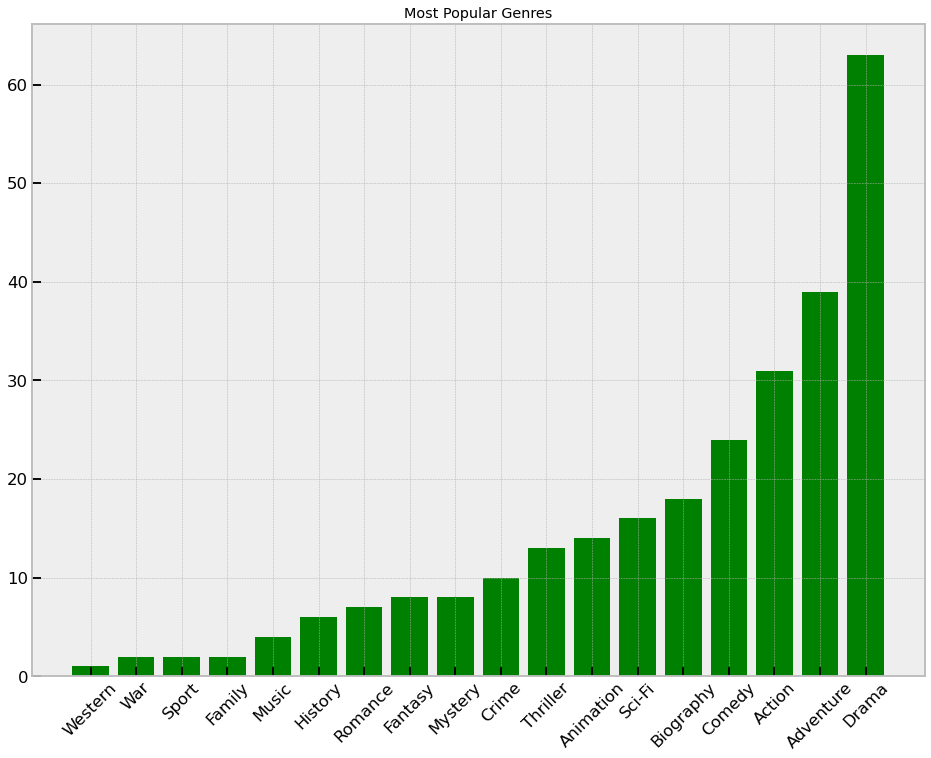

In [19]:
big_df["genres"].nunique()
big_df.iloc[:100]["genres"].map(lambda x: x.split())
big_df["genres"][:8]

new = big_df.iloc[:100]["genres"].str.split(',')
dic = {}         
for i in new:
    for y in i:
        if y not in dic:
            dic[y] = 1
        else:
            dic[y] += 1

dic2 = dict(sorted(dic.items(), key=lambda item: item[1]))
with plt.style.context("bmh"):
    plt.figure(figsize=(16, 12))
    plt.xticks(rotation=45)
    plt.bar(list(dic2.keys()), dic2.values(), color='g')
    plt.title("Most Popular Genres");
    plt.show()

#Out of top-100 rated movies (all with above 100,000 ratings), finding most popular genres
#if movie has more than one genre, each genre is still counted as 1


Microsoft should highly consider trending towards an action, adventure, or drama movie. Out of the highest rated and most rated movies, these types of movies consistently came out on top.

In [20]:
from bs4 import BeautifulSoup
import requests
import json

In [21]:
url = "https://www.imdb.com/chart/moviemeter/?sort=nv,desc&mode=simple&page=1"
source_code = requests.get(url).text
parsed_code = BeautifulSoup(source_code, "html.parser")
first = parsed_code.find_all("td", class_ = "titleColumn")
ratings = []
budgets_ = []
revenues = []
movie_name = []
runtimes = []
for i in first:
    year = False
    try:
        #Finding movies with year between 2015 and 2020
        year_data = int((i.find("span", class_ = "secondaryInfo").text)[1:-1])
        if 2015<= year_data <=2020:
            year = True
        
    except:
        pass
    
    #if between 2015 and 2020, execute following code
    if year:
        print(i.find("a").text, " ", year_data)
        url2 = "https://www.imdb.com" + i.find("a")["href"]
        #getting info for each movies individual web page
        source_code2 = requests.get(url2).text
        parsed_code2 = BeautifulSoup(source_code2, "html.parser")
        second = parsed_code2.find_all("div")
        for j in second:
            found = False
            found2 = False
            txt = j.get_text()
            try:
                budget = txt.split('Budget:$')[1].split()[0]
                revenue = txt.split('Cumulative Worldwide Gross:')[1].split()[0][1:]
                print("Budget: ", budget)
                print("Gross: ", revenue)
                found = True
                break
                
            except:
                pass
                
        try:
            #getting info from json object 
            data = json.loads(parsed_code2.find('script', type='application/ld+json').string)
            rating = data["contentRating"]
            print(rating)
        except:
            pass
        
        try:    
            fourth = parsed_code2.find_all('time')
            runtime = fourth[1].text
            print(runtime + "\n")
            found2 = True
        except:
            pass
        
        #if budget, revenue, and runtime are all found, execute the following:
        if found == True and found2 == True:
            budgets_.append(budget)
            revenues.append(revenue)
            ratings.append(rating)
            movie_name.append(i.find("a").text)
            runtimes.append(runtime)
            


    

Joker   2019
Budget:  55,000,000
Gross:  1,074,251,311
R
122 min

Mad Max: Fury Road   2015
Budget:  150,000,000
Gross:  375,274,075
R
120 min

Avengers: Endgame   2019
Budget:  356,000,000
Gross:  2,797,800,564
PG-13
181 min

Once Upon a Time... In Hollywood   2019
Budget:  90,000,000
Gross:  374,343,626
R
161 min

Parasite   2019
Budget:  11,400,000
Gross:  258,580,423
R
132 min

Knives Out   2019
Budget:  40,000,000
Gross:  311,398,301
PG-13
130 min

1917   2019
Budget:  95,000,000
Gross:  384,792,488
R
119 min

Star Wars: The Rise Of Skywalker   2019
Budget:  275,000,000
Gross:  1,074,144,248
PG-13
141 min

Spider-Man: Into the Spider-Verse   2018
Budget:  90,000,000
Gross:  375,540,831
PG
117 min

Jojo Rabbit   2019
Budget:  14,000,000
Gross:  90,335,025
PG-13
108 min

The Gentlemen   2019
Budget:  22,000,000
Gross:  115,171,795
R
113 min

Tenet   2020
Budget:  205,000,000
Gross:  359,900,000
PG-13
150 min

Enola Holmes   2020
PG-13
123 min

Borat Subsequent Moviefilm   2020
R
95 

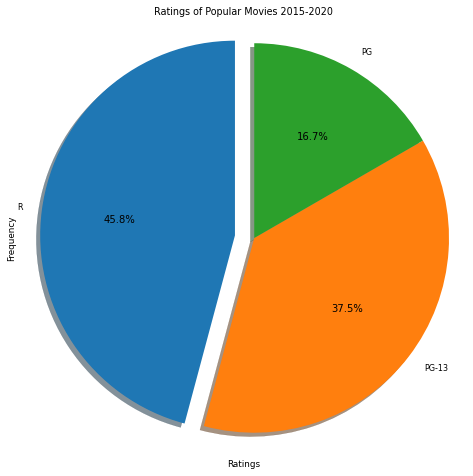

In [22]:
ratings
dict1 = {}
for i in ratings:
    if i not in dict1:
        dict1[i] = 1
    else:
        dict1[i] += 1
dict1
keys = dict1.keys()
values = dict1.values()
with plt.style.context("seaborn-paper"):
    plt.figure(figsize =(8,8))
    plt.pie(values, labels = dict1.keys(), shadow=True, startangle=90, explode = (.1,0,0),autopct='%1.1f%%')
    plt.title("Ratings of Popular Movies 2015-2020");# Look at title
    plt.xlabel("Ratings");
    plt.ylabel("Frequency");
    plt.axis('equal') 
#out of most popular movies 2015-2020, which genre appears most frequently

Microsoft should strong consider entering the movie industry with a film that is rated R or PG-13


,Budgets,Gross,Ratings,Run Time,ROI
Movie Name,,,,,
Parasite,1140.0,25858.0423,R,132,22.682493
Joker,5500.0,107425.1311,R,122,19.531842
Avengers: Endgame,35600.0,279780.0564,PG-13,181,7.858990
Knives Out,4000.0,31139.8301,PG-13,130,7.784958
The Grinch,7500.0,51178.2007,PG,85,6.823760
Jojo Rabbit,1400.0,9033.5025,PG-13,108,6.452502
The Gentlemen,2200.0,11517.1795,R,113,5.235082
Last Christmas,2500.0,12155.0750,PG-13,103,4.862030
Spider-Man: Into the Spider-Verse,9000.0,37554.0831,PG,117,4.172676


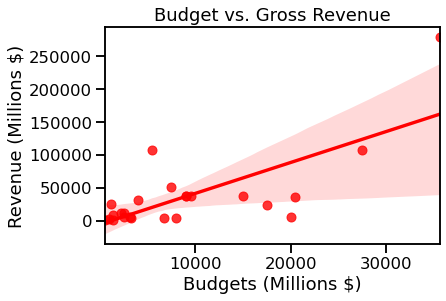

In [23]:
import numpy as np
#create df from beautiful soup info
df = pd.DataFrame(
    {'Budgets': budgets_,
     'Gross': revenues,
     'Ratings': ratings,
     "Movie Name": movie_name,
     "Run Time": runtimes
    })

df = df.set_index("Movie Name")
#cleaning up data so budgets, runtime, and revenue can all be converted into integers
df["Budgets"] = df["Budgets"].map(lambda x: int(x.replace("," , "")))
df["Gross"] = df["Gross"].map(lambda x: int(x.replace("," , "")))
df["Run Time"] = df["Run Time"].map(lambda x: int(x.split()[0]))
df["Budgets"] = df["Budgets"]/10000
df["Gross"] = df["Gross"]/10000
sns.regplot(data=df, x="Budgets", y="Gross", color = "red");
#plt.xticks(np.arange(0,400,50))
plt.yticks(np.arange(0,300000,50000))
plt.xlabel("Budgets (Millions $)")
plt.ylabel("Revenue (Millions $)")
#plotting budget and revenue relationship for beautiful soup info instead
plt.title("Budget vs. Gross Revenue");
df["ROI"] = (df["Gross"]/df["Budgets"])
df.sort_values("ROI", ascending = False)

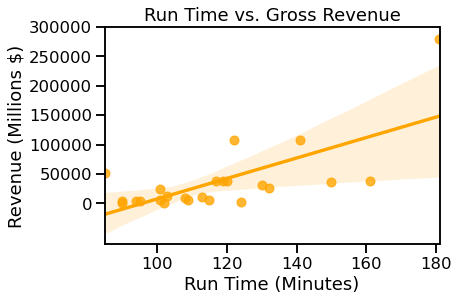

In [24]:
with plt.style.context("fast"):
    sns.regplot(data=df, x="Run Time", y="Gross", color = "orange");
    plt.yticks(np.arange(0,350000,50000))
    plt.ylabel("Revenue (Millions $)")
    plt.xlabel("Run Time (Minutes)")
    plt.title("Run Time vs. Gross Revenue");
#Plotting runtime vs gross revenue for beautiful soup info 

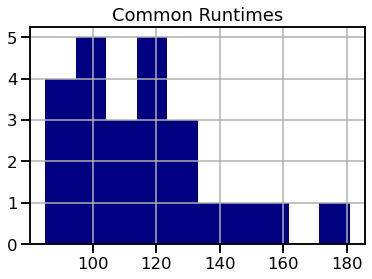

In [25]:
df["Run Time"].hist(color = "navy");
plt.title("Common Runtimes");

(85.0, 181.0)

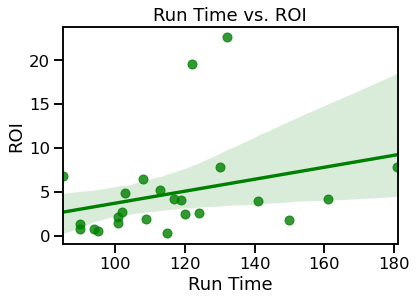

In [26]:
sns.regplot(data=df, x="Run Time", y="ROI", color = "green");
plt.title("Run Time vs. ROI");
plt.xlim(85,181)
#plotting runtime vs ROI for beautiful soup info 

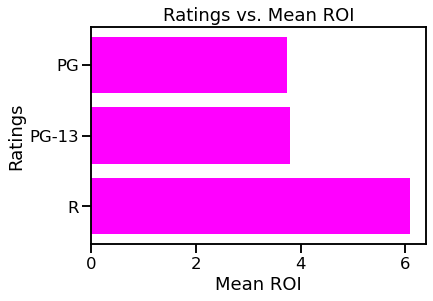

In [27]:
R_mean = df.loc[df["Ratings"] == "R"]["ROI"].mean()
PG13_mean = df.loc[df["Ratings"] == "PG-13"]["ROI"].mean()
PG_mean = df.loc[df["Ratings"] == "PG"]["ROI"].mean()
rating_list = ["R", "PG-13", "PG"] # or list(set(df["Ratings"]))
with plt.style.context('seaborn-bright'):
    plt.barh(rating_list, [R_mean, PG13_mean, PG_mean], color = "magenta")
    plt.xlabel("Mean ROI")
    plt.ylabel("Ratings")
    plt.title("Ratings vs. Mean ROI")
#Ratings and their mean ROI for beautiful soup data

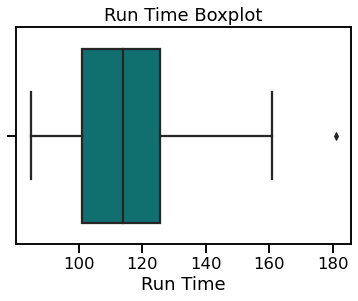

In [28]:
sns.boxplot(x = df["Run Time"], color = "teal")
plt.title("Run Time Boxplot");

While there was less data obtained through web scraping, this data conveys the same picture as the previous data. Most common runtimes are around the two hour mark, there is a positive correlation between budget and revenue, and the rating given to a movie can definetly have an impact on its popularity.

# Conclusion
- After analysis of the given data, as well as data analyzed through BeautifulSoup, there are a few assumptions that can be made. First of all, Microsoft should er on the side of producing a movie rated PG-13, or R, as these ratings accounted for a large majority of the most popular movies examined. The runtime of the movie should be around 120 minutes, but there shouldn't be that much worry if it goes over. Microsoft would be best off producing an action, adventure, or drama movie as these were the most popular genres of the top 100 rated movies (Flatiron Data). There also shouldn't be too much worry on spending a large chunk of money during the production process, as the data suggested that the more movies invest in themselves the more revenue they usually tend to recieve. Lastly, movies such as Mad Max, Paranormal Activity 4, The Gallows, and The Blair Witch Project should all be watched and studied to see how they all made over 400 times the money they invested in the production process.